
# Essential Tools Workshop: pandas, NumPy, matplotlib  
**Goal:** Load some data, make a scatter plot, and draw a simple line of best fit.  
_Side quest:_ learn just enough pandas/NumPy/matplotlib to be dangerous (and charming).



## Setup
We'll import the three musketeers of Python data work:
- **pandas** for tables,
- **NumPy** for numbers,
- **matplotlib** for plots.


In [2]:

# If you're running locally and need to install:
# !pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Jupyter nicety so plots show up below each cell
%matplotlib inline



## Step 1. Get some data (two options)
We'll create a small CSV (so nobody has to download anything) **and** show how to read it.

**Columns:**
- `hours_studied` (x)
- `exam_score` (y)


In [3]:

import os

# Create a tiny dataset (a little noise keeps it real)
rng = np.random.default_rng(7)
hours = np.linspace(0, 10, 30)
scores = 50 + 5*hours + rng.normal(0, 5, size=hours.size)

demo = pd.DataFrame({
    "hours_studied": hours.round(2),
    "exam_score": scores.round(2)
})

print("Wrote data/study_scores.csv with", len(demo), "rows")
demo.head()


Wrote data/study_scores.csv with 30 rows


,hours_studied,exam_score
0,0.00,50.01
1,0.34,53.22
2,0.69,52.08
3,1.03,50.72
4,1.38,54.62



## Step 2. pandas 101 (reading, peeking, selecting)
pandas turns your CSV into a **DataFrame** (a table with superpowers).


In [4]:

# Read the CSV
df = demo  # replace with pd.read_csv("data/study_scores.csv") if needed

# Quick peeks
display(df.head())          # first five rows
display(df.tail(3))         # last three rows
display(df.sample(5))       # a random sample

# Structure & summary
display(df.info())          # column names + types + missing values
display(df.describe())      # basic stats (mean, std, min, max, quartiles)


,hours_studied,exam_score
0,0.00,50.01
1,0.34,53.22
2,0.69,52.08
3,1.03,50.72
4,1.38,54.62


,hours_studied,exam_score
27,9.31,93.86
28,9.66,98.03
29,10.00,100.57


,hours_studied,exam_score
26,8.97,82.24
24,8.28,92.16
0,0.00,50.01
9,3.10,62.41
2,0.69,52.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hours_studied  30 non-null     float64
 1   exam_score     30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


None

,hours_studied,exam_score
count,30.00000,30.000000
mean,5.00000,72.929333
std,3.03703,14.734045
min,0.00000,50.010000
25%,2.49750,61.600000
50%,5.00000,71.375000
75%,7.50250,82.077500
max,10.00000,100.570000



### Selecting columns & rows
- Column(s): `df["col"]` or `df[["col1","col2"]]`  
- Row filter: boolean masks like `df[df["hours_studied"] > 5]`


In [5]:

x = df["hours_studied"]            # a pandas Series
y = df["exam_score"]               # another Series

over_5 = df[df["hours_studied"] > 5]
display(over_5.head())


,hours_studied,exam_score
15,5.17,79.34
16,5.52,70.87
17,5.86,77.02
18,6.21,71.53
19,6.55,76.31



# Step 3. Cleaning basics (a tiny taste)
Real data is messy. A few handy moves:
- `dropna()` to remove missing values
- `fillna(value)` to fill them
- `rename(columns={...})` to tidy names
- type conversions: `df["col"].astype(float)`


In [6]:

# (Our toy data is already clean, but here's the pattern.)
df_clean = (
    df
    .dropna()
    .rename(columns={"hours_studied": "hours", "exam_score": "score"})
)
display(df_clean.head())


,hours,score
0,0.00,50.01
1,0.34,53.22
2,0.69,52.08
3,1.03,50.72
4,1.38,54.62



## Step 4. NumPy 101 (arrays, simple math)
NumPy is great for **numeric operations** and quick math on arrays.


In [7]:

hours_np = df_clean["hours"].to_numpy()
score_np = df_clean["score"].to_numpy()

print("hours type:", type(hours_np), "shape:", hours_np.shape)
print("score  mean:", np.mean(score_np).round(2), "| std:", np.std(score_np).round(2))

# A quick transform example (no need to use it later—just demoing)
scaled_hours = (hours_np - hours_np.mean()) / hours_np.std()
scaled_hours[:5]


hours type: <class 'numpy.ndarray'> shape: (30,)
score  mean: 72.93 | std: 14.49


array([-1.67448993, -1.56062461, -1.44341032, -1.329545  , -1.21233071])


## Step 5. matplotlib 101 (scatter plots)
Minimal recipe for a scatter plot:
1. `plt.figure()` to start a new figure
2. `plt.scatter(x, y)` to plot dots
3. Labels + title so Future You knows what's going on
4. `plt.show()` (shown automatically in notebooks)


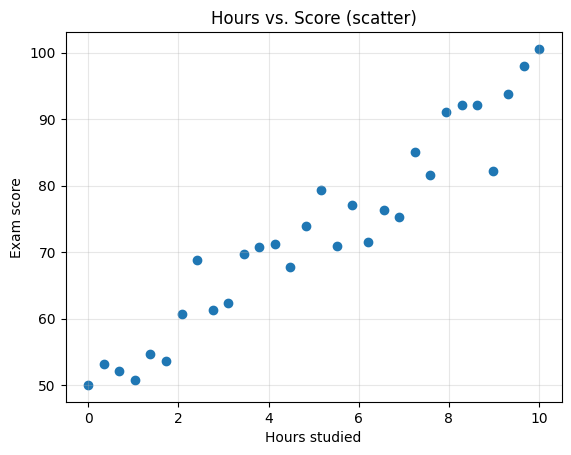

In [8]:

plt.figure()
plt.scatter(df_clean["hours"], df_clean["score"])
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Hours vs. Score (scatter)")
plt.grid(True, alpha=0.3)
plt.show()



## Step 6. A simple line of best fit (with NumPy)
We can fit a straight line \( y = m x + b \) using `np.polyfit(x, y, 1)`.

- `m` = slope (how much the score changes per extra hour)
- `b` = intercept (score when hours = 0)

We'll plot the line **on top** of the scatter plot.


slope (m) = 4.664, intercept (b) = 49.611


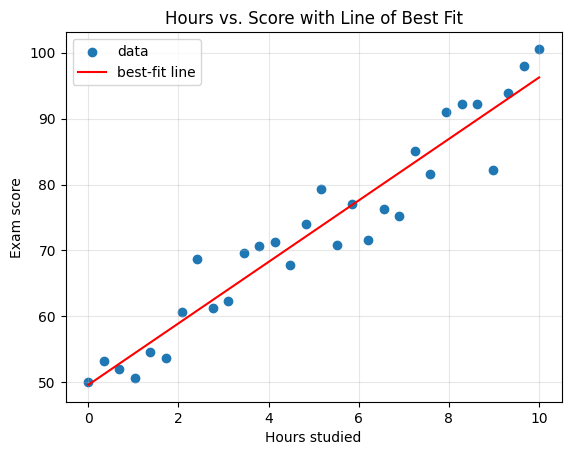

In [9]:

# Fit a first-degree polynomial (a line): y ≈ m*x + b
m, b = np.polyfit(df_clean["hours"], df_clean["score"], 1)

# Create x-values across the range to draw the line
x_line = np.linspace(df_clean["hours"].min(), df_clean["hours"].max(), 100)
y_line = m * x_line + b

print(f"slope (m) = {m:.3f}, intercept (b) = {b:.3f}")

plt.figure()
plt.scatter(df_clean["hours"], df_clean["score"], label="data")
plt.plot(x_line, y_line, label="best-fit line", color="red")
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Hours vs. Score with Line of Best Fit")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## Step 7. Save your work
Always nice to keep artifacts:
- a cleaned CSV
- a plot image


'Saved: outputs/figures/hours_vs_score.png'

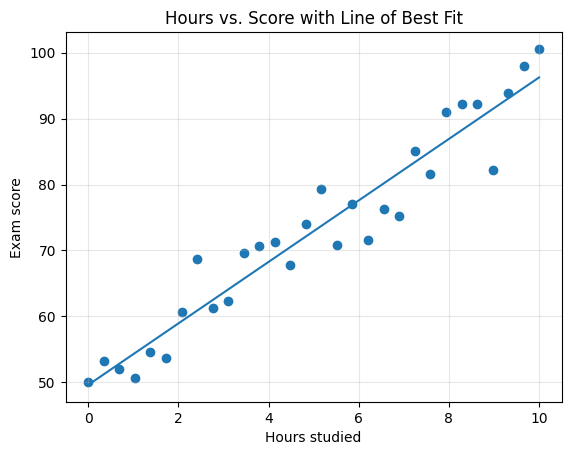

In [12]:

import os
os.makedirs("./outputs/figures", exist_ok=True)
os.makedirs("./data/processed", exist_ok=True)

# Save a clean CSV
df_clean.to_csv("data/processed/study_scores_clean.csv", index=False)

# Recreate & save the plot
plt.figure()
plt.scatter(df_clean["hours"], df_clean["score"])
plt.plot(x_line, y_line)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Hours vs. Score with Line of Best Fit")
plt.grid(True, alpha=0.3)
plt.savefig("outputs/figures/hours_vs_score.png", bbox_inches="tight")
"Saved: outputs/figures/hours_vs_score.png"



## Step 8. Wrap-up
You just:
- loaded a CSV with **pandas**,
- wrangled a few basics,
- did simple math with **NumPy**,
- made a scatter plot and best-fit line with **matplotlib** + **NumPy**.

Next step in the series: bring data from a **database (SQL)** instead of a single CSV.
